# Data Understanding

## Import Library

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## Data Loading

In [2]:
# Load datasets
movies = pd.read_csv('assets\movie\movies.csv')
ratings = pd.read_csv('assets\movie\\ratings.csv')

## Exploratory Data Analysis (EDA)

### movies.csv

#### Menampilkan dataset movies

In [3]:
# Tampilkan dataset movies
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### Menghitung jumlah film

In [4]:
print("Jumlah film:",len(movies['movieId'].unique()))

Jumlah film: 9742


#### Melakukan visualisasi jumlah film per genre

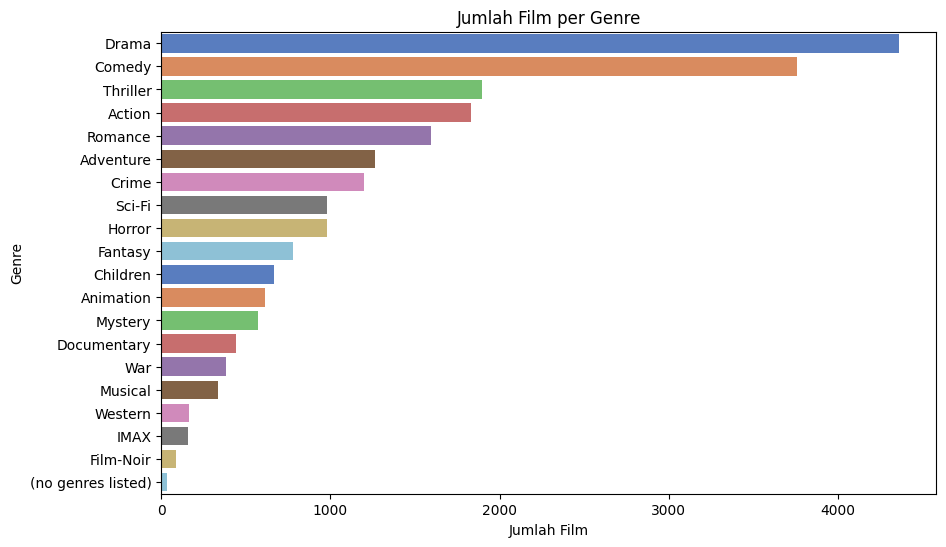

In [5]:
# Visualisasi Jumlah Film per Genre
genre_count = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='muted')
plt.title('Jumlah Film per Genre')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

### ratings.csv

#### Menampilkan dataset ratings

In [6]:
# Tampilkan dataset ratings
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#### Menghitung Jumlah user dan film

In [7]:
# Menghitung Jumlah user dan film
print("Jumlah user:",len(ratings['userId'].unique()),"\nJumlah film:",len(ratings['movieId'].unique()))

Jumlah user: 610 
Jumlah film: 9724


#### Menampilkan statistik deskriptif ratings

In [8]:
# Statistik Deskriptif ratings
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### Melakukan visualisasi rating film

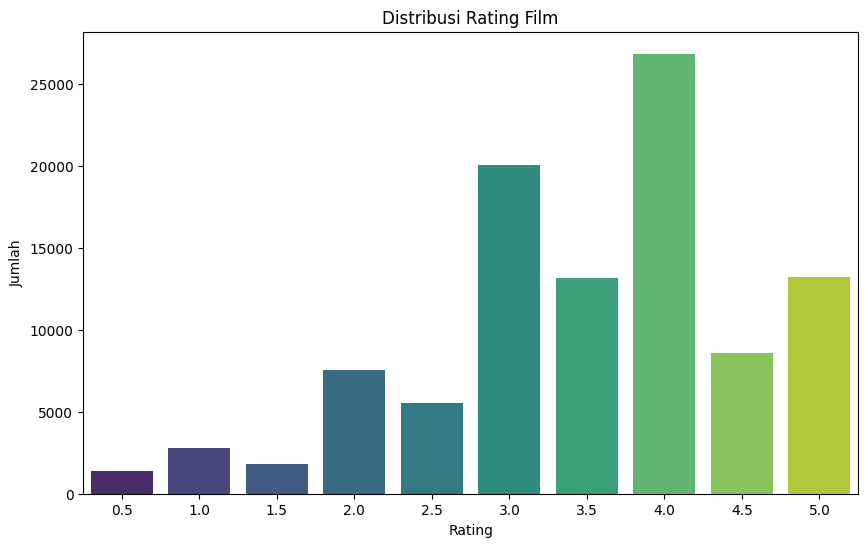

In [9]:
# Visualisasi Distribusi Rating
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

#### Menganalisis jumlah rating per tahun

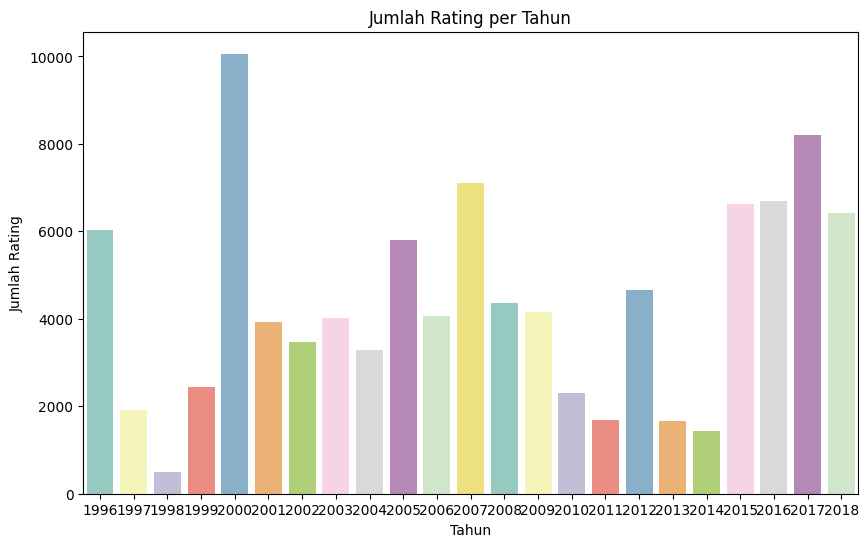

In [10]:
# Analisis Waktu
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(x='year', data=ratings, palette='Set3')
plt.title('Jumlah Rating per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Rating')
plt.show()

# Content-Based Filtering

## Data Preparation

### Menyalin dataset movies

In [11]:
# Mengcopy dataset movie
movies_df = movies.copy()

### Membuat kolom baru berdasarkan genre

In [12]:
# Membuat kolom baru untuk setiap genre
genres = set()
for genre_string in movies_df['genres']:
    genres.update(genre_string.split('|'))

# Inisialisasi kolom dengan nilai 0
for genre in genres:
    movies_df[genre] = 0

# Mengisi nilai kolom baru
for index, row in movies_df.iterrows():
    for genre in row['genres'].split('|'):
        movies_df.at[index, genre] = 1

### Menghapus baris yang tidak memiliki genre

In [13]:
# Menghapus baris yang tidak memiliki genre
movies_df = movies_df[movies_df['genres'] != '(no genres listed)']

### Menampilkan data yang sudah diolah

In [14]:
# Menampilkan dataset
movies_df

,movieId,title,genres,Romance,Drama,Musical,Documentary,Fantasy,Adventure,Comedy,...,Thriller,Action,Children,Crime,Western,Mystery,Horror,War,Sci-Fi,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Menghapus kolom yang tidak diperlukan

In [15]:
movies_df.drop('(no genres listed)', axis=1, inplace=True)

### Menampilkan kolom pada data

In [16]:
movies_df.columns

Index(['movieId', 'title', 'genres', 'Romance', 'Drama', 'Musical',
       'Documentary', 'Fantasy', 'Adventure', 'Comedy', 'IMAX', 'Animation',
       'Film-Noir', 'Thriller', 'Action', 'Children', 'Crime', 'Western',
       'Mystery', 'Horror', 'War', 'Sci-Fi'],
      dtype='object')

## Model Development

### Menghitung cosine similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# Hitung similarity score
similarity_matrix = cosine_similarity(movies_df.iloc[:, 3:])  # Menghitung similarity score dari kolom genre

### Membuat fungsi untuk rekomendasi

In [18]:
# Buat fungsi untuk mendapatkan rekomendasi
def get_recommendations(movie_title, similarity_matrix=similarity_matrix, movies_df=movies_df, top_n=10):
    idx = movies_df.index[movies_df['title'] == movie_title].tolist()[0] # Dapatkan indeks film berdasarkan judul
    similarity_scores = list(enumerate(similarity_matrix[idx])) # Dapatkan similarity scores dari film dengan film lainnya
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True) # Urutkan similarity scores dari yang tertinggi
    top_similar_movies = similarity_scores[1:top_n+1] # Ambil top N film yang paling mirip
    recommended_movies = [(movies_df.iloc[movie[0]]['title'], movie[1]) for movie in top_similar_movies] # Dapatkan judul dari film-film yang direkomendasikan
    
    return recommended_movies

### Simulasi penggunaan sistem rekomendasi

In [19]:
# Memilih judul film secara acak dari dataset
random_movie_title = random.choice(movies_df['title'])
random_movie_genre = movies_df.loc[movies_df['title'] == random_movie_title, 'genres'].values[0]

# Mendapatkan rekomendasi untuk film tersebut
recommendations = get_recommendations(random_movie_title, similarity_matrix, movies_df)

# Menampilkan judul dan genre dari film yang direkomendasikan
print(f"Judul: {random_movie_title}")
print(f"Genre: {random_movie_genre}")
print("======"*7)
print("TOP 10 REKOMENDASI FILM")
print("======"*7)
print
number = 1
for movie, score in recommendations:
    genres = movies_df[movies_df['title'] == movie]['genres'].values[0]
    print(f"{number}.) {movie}, Genre: {genres})")
    number+=1

Judul: Pay It Forward (2000)
Genre: Drama
TOP 10 REKOMENDASI FILM
1.) Othello (1995), Genre: Drama)
2.) Dangerous Minds (1995), Genre: Drama)
3.) Cry, the Beloved Country (1995), Genre: Drama)
4.) Restoration (1995), Genre: Drama)
5.) Georgia (1995), Genre: Drama)
6.) Home for the Holidays (1995), Genre: Drama)
7.) Mr. Holland's Opus (1995), Genre: Drama)
8.) Boys of St. Vincent, The (1992), Genre: Drama)
9.) Basketball Diaries, The (1995), Genre: Drama)
10.) Awfully Big Adventure, An (1995), Genre: Drama)


# Collaborative Filtering

## Cluster Based Algorithm

### Data Preparation

#### Melakukan import library yang dibutuhkan

In [20]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#### Menggabungkan dataset ratings dan movies

In [21]:
# Menggabungkan dataset ratings dan movies
data = pd.merge(ratings, movies, on='movieId')

#### Membuat pivot table untuk user-item

In [22]:
# Membuat pivot table untuk user-item
user_item_matrix = data.pivot_table(index='userId', columns='movieId', values='rating')

#### Mengisi nilai null dengan 0

In [23]:
# Mengisi nilai null dengan 0
user_item_matrix = user_item_matrix.fillna(0)

#### Menampilkan matrix rating

In [24]:
# Menampilkan user-item matrix
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model development

#### Membuat pipeline

In [25]:
# Menggunakan Pipeline untuk menangani proses standarisasi dan clustering 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

#### Membuat parameter untuk dilakukan hyperparameter tuning

In [26]:
# Mengatur parameter untuk grid search
param_grid = {
    'kmeans__n_clusters': list(range(5, 21)),
    'kmeans__init': ['random'], 
    'kmeans__n_init': [5, 10, 15],  
    'kmeans__max_iter': [100, 150, 200], 
    'kmeans__tol': [0.00001, 0.0001, 0.001],  
    'kmeans__random_state': [42]  
}

#### Melakukan hyperparameter tuning dengan metode GridSearch

In [27]:
# Melakukan grid search untuk menemukan parameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_search.fit(user_item_matrix)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.4s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.3s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.3s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.2s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.2s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=0.0001; total time=   0.2s
[CV] 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             param_grid={'kmeans__init': ['random'],
                         'kmeans__max_iter': [100, 150, 200],
                         'kmeans__n_clusters': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                14, 15, 16, 17, 18, 19, 20],
                         'kmeans__n_init': [5, 10, 15],
                         'kmeans__random_state': [42],
                         'kmeans__tol': [1e-05, 0.0001, 0.001]},
             verbose=2)

#### Mendapatkan parameter terbaik

In [28]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'kmeans__init': 'random', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 18, 'kmeans__n_init': 10, 'kmeans__random_state': 42, 'kmeans__tol': 1e-05}
Best Score: -1388923.7242022362


#### Melakukan clustering dengan parameter terbaik

In [29]:
# Melakukan clustering dengan parameter terbaik
best_kmeans = KMeans(n_clusters=best_params['kmeans__n_clusters'], init=best_params['kmeans__init'])
clusters = best_kmeans.fit_predict(user_item_matrix)

#### Menambahkan kolom 'cluster' pada matrix

In [30]:
# Menambahkan kolom 'cluster' pada user_item_matrix
user_item_matrix['cluster'] = clusters

#### Membuat fungsi rekomendasi film

In [31]:
# Membuat fungsi untuk mendapatkan rekomendasi
def recommend_movies_kmeans(user_id, num_recommendations=10):
    user_cluster = user_item_matrix.loc[user_id]['cluster']
    cluster_movies = user_item_matrix[user_item_matrix['cluster'] == user_cluster].drop(columns='cluster')
    user_ratings = user_item_matrix.loc[user_id].drop('cluster')
    recommended_movies = cluster_movies.mean().sort_values(ascending=False)
    already_rated = user_ratings[user_ratings > 0].index
    recommended_movies = recommended_movies.drop(already_rated)
    recommended_movies = recommended_movies.reset_index()
    recommended_movies = pd.merge(recommended_movies, movies, left_on='movieId', right_on='movieId')

    # Menghitung MSE dan RMSE
    actual_ratings = user_item_matrix.loc[user_id].drop('cluster')
    predicted_ratings = cluster_movies.mean()
    predicted_ratings = predicted_ratings[actual_ratings.index]
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = np.sqrt(mse)
    print("MSE:", mse)
    print("RMSE:", rmse)
    
    return recommended_movies[['movieId', 'title', 'genres']].head(num_recommendations)

#### Simulasi penggunaan sistem rekomendasi

In [32]:
# Contoh penggunaan sistem rekomendasi film
user_id = np.random.randint(1, user_item_matrix.shape[0] + 1)
print("TOP 10 REKOMENDASI FILM UNTUK USER", user_id, ":")
recommend_movies_kmeans(user_id)

TOP 10 REKOMENDASI FILM UNTUK USER 85 :
MSE: 0.05743065031937357
RMSE: 0.2396469284580413


,movieId,title,genres
0,318,"Shawshank Redemption, The (1994)",Crime|Drama
1,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
5,2959,Fight Club (1999),Action|Crime|Drama|Thriller
6,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7,2858,American Beauty (1999),Drama|Romance
8,858,"Godfather, The (1972)",Crime|Drama
9,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure


## Deep Learning

### Data Preparation

#### Melakukan import library yang dibutuhkan

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

#### Menggabungkan dataset ratings dan movies

In [34]:
# Menyiapkan dataset
data_dl = pd.merge(ratings, movies, on='movieId')

#### Menampilkan dataset

In [35]:
# Menampilkan dataset
data_dl

,userId,movieId,rating,timestamp,year,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,1996-11-08 06:36:02,1996,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,2005-01-25 06:52:26,2005,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,2017-11-13 12:59:30,2017,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,2011-05-18 05:28:03,2011,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,2016,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,2016-11-19 08:43:18,2016,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,2017-05-03 20:53:14,2017,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,2017-05-03 21:59:49,2017,Blair Witch (2016),Horror|Thriller


#### Melakukan proses encoding pada userId dan movieId

In [36]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = data_dl['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, 40, 43, 44, 45, 46, 50, 54, 57, 63, 64, 66, 68, 71, 73, 76, 78, 82, 86, 89, 90, 91, 93, 96, 98, 103, 107, 112, 119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151, 153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179, 182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217, 219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252, 254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280, 282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323, 328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399, 401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451, 453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483, 484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 525, 528, 529, 533, 534, 541, 544, 550, 555, 559, 560, 561, 562, 567, 570, 572, 573, 579, 580, 584, 587, 590, 596, 597, 599,

In [37]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = data_dl['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

#### Melakukan mapping pada data

In [38]:
# Mapping userID ke dataframe user
data_dl['user'] = data_dl['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
data_dl['movie'] = data_dl['movieId'].map(movie_to_movie_encoded)

#### Mencari jumlah user dan movie serta nilai maksimum dan minimum rating

In [39]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)

# Mengubah rating menjadi nilai float
data_dl['rating'] = data_dl['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['rating'])

# Nilai maksimal rating
max_rating = max(data['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


#### Melakukan teknik one-hot encoding

In [40]:
# Melakukan one-hot encoding user dan movie
user_encoded = pd.get_dummies(data_dl['user'], prefix='user')
movie_encoded = pd.get_dummies(data_dl['movie'], prefix='movie')

# Menggabungkan user dan movie
encoded_data = pd.concat([user_encoded, movie_encoded], axis=1)

#### Menentukan variabel x dan y

In [41]:
# Membuat variabel input X
X = encoded_data.values
# Membuat variabel y untuk membuat rating dari hasil
y = data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

#### Membagi dataset untuk training dan testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model development

#### Membangun model

In [43]:
# Definisikan model
class RecommenderHyperModel(HyperModel):
    def __init__(self, num_users, num_movies):
        self.num_users = num_users
        self.num_movies = num_movies

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=self.num_users + self.num_movies))
        model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                      loss=MeanSquaredError(),
                      metrics=[RootMeanSquaredError()])

        return model

#### Membuat fungsi callback

In [44]:
# Membuat ThresholdLossCallback
class ThresholdLossCallback(Callback):
    def __init__(self, threshold):
        super(ThresholdLossCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('root_mean_squared_error') is not None and logs.get('root_mean_squared_error') < self.threshold:
            print(f"\nTraining stopped as root_mean_squared_error ({logs.get('root_mean_squared_error'):.4f}) has reached the threshold ({self.threshold})")
            self.model.stop_training = True

rmse_threshold_callback = ThresholdLossCallback(threshold=0.01)

In [45]:
# Fungsi callback yang digunakan
callbacks = [
    EarlyStopping(monitor='root_mean_squared_error', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.h5', monitor='root_mean_squared_error', save_best_only=True, verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001, verbose=1), #
    rmse_threshold_callback
]

#### Melakukan hyperparameter tuning

In [46]:
# Melakukan hyperparameter tuning
hypermodel = RecommenderHyperModel(num_users, num_movie)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='recommender_system'
)

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             batch_size=128,
             validation_data=(X_test, y_test))

Reloading Tuner from my_dir\recommender_system\tuner0.json
Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


#### Membuat model dari hyperparameter terbaik

In [47]:
# Mengambil model terbaik dari hyperparameter tuning
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               1984320   
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 192)               37056     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 193       
                                                                 
Total params: 2,021,569
Trainable params: 2,021,569
Non-trainable params: 0
_________________________________________________________________


#### Mengcompile dan training model

In [48]:
# Compile dan latih model terbaik
best_model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                   loss=MeanSquaredError(),
                   metrics=[RootMeanSquaredError()])

history = best_model.fit(X_train, y_train,
                         epochs=100,
                         validation_data=(X_test, y_test),
                         callbacks=callbacks,
                         batch_size=128)

Epoch 1/100
705/709 [============================>.] - ETA: 0s - loss: 0.0313 - root_mean_squared_error: 0.1768
Epoch 1: root_mean_squared_error improved from inf to 0.17680, saving model to best_model.h5
709/709 [==============================] - 6s 7ms/step - loss: 0.0313 - root_mean_squared_error: 0.1768 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1895 - lr: 0.0010
Epoch 2/100
709/709 [==============================] - ETA: 0s - loss: 0.0285 - root_mean_squared_error: 0.1688
Epoch 2: root_mean_squared_error improved from 0.17680 to 0.16884, saving model to best_model.h5
709/709 [==============================] - 5s 7ms/step - loss: 0.0285 - root_mean_squared_error: 0.1688 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1902 - lr: 0.0010
Epoch 3/100
704/709 [============================>.] - ETA: 0s - loss: 0.0257 - root_mean_squared_error: 0.1602
Epoch 3: root_mean_squared_error improved from 0.16884 to 0.16024, saving model to best_model.h5
709/709 [====================

#### Visualisasi Root Mean Squared Error (RMSE)

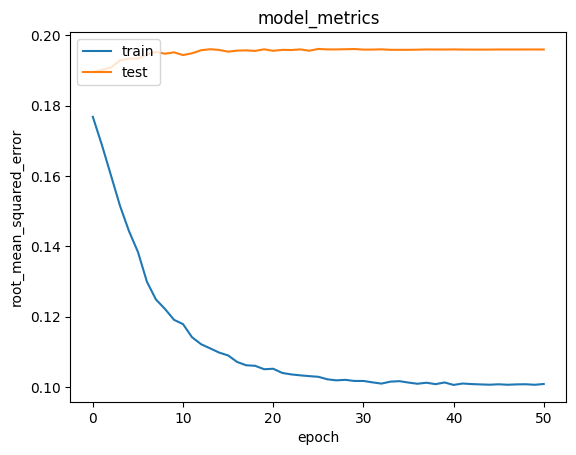

In [49]:
# Membuat plot grafik metrics
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Mempersiapkan data movies dengan id yang baru

In [50]:
# Membuat kolom ID baru dengan hasil encoding movieId
movies['new_movieId'] = movies['movieId'].map(movie_to_movie_encoded)

# Menangani nilai non-finite dengan menggantinya dengan nilai -1
movies['new_movieId'] = movies['new_movieId'].fillna(-1)

# Mengonversi kolom ke tipe data integer
movies['new_movieId'] = movies['new_movieId'].astype(int)

# Tampilkan data movies setelah penambahan kolom ID baru dan penghapusan nilai kosong
movies[['movieId', 'title', 'new_movieId']]

,movieId,title,new_movieId
0,1,Toy Story (1995),0
1,2,Jumanji (1995),481
2,3,Grumpier Old Men (1995),1
3,4,Waiting to Exhale (1995),482
4,5,Father of the Bride Part II (1995),483
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),5487
9738,193583,No Game No Life: Zero (2017),5488
9739,193585,Flint (2017),5489
9740,193587,Bungo Stray Dogs: Dead Apple (2018),5490


#### Membuat fungsi untuk mendapatkan rekomendasi

In [51]:
# Membuat fungsi untuk rekomendasi
def recommend_movies_dl(user_id,n):
    unwatched_movies = data_dl[data_dl['user'] != user_id]['movie'].unique() # Filter film-film yang belum ditonton oleh pengguna
    user_input = np.array([user_to_user_encoded[user_id]] * len(unwatched_movies)) # Buat input untuk model berdasarkan pengguna yang akan direkomendasikan dan film-film yang belum ditonton
    movie_input = np.array(unwatched_movies)
    user_encoded_input = tf.keras.utils.to_categorical(user_input, num_classes=num_users) # Buat one-hot encoded input untuk user
    movie_encoded_input = tf.keras.utils.to_categorical(movie_input, num_classes=num_movie) # Buat one-hot encoded input untuk movie
    X_recommend = np.concatenate((user_encoded_input, movie_encoded_input), axis=1) # Gabungkan kedua input
    predicted_ratings = best_model.predict(X_recommend).flatten() # Prediksi rating untuk film-film yang belum ditonton
    unwatched_movie_ids = [movie_encoded_to_movie[movie_id] for movie_id in movie_input] # Filter film-film yang sudah ditonton oleh pengguna
    unwatched_movies_df = movies[movies['new_movieId'].isin(unwatched_movie_ids)] # Buat DataFrame untuk film-film yang belum ditonton
    
    # Gabungkan data rating yang diprediksi dengan data film-film yang belum ditonton
    recommendations = pd.DataFrame({'movieId': unwatched_movie_ids, 'predicted_rating': predicted_ratings})
    recommendations = pd.merge(recommendations, unwatched_movies_df, on='movieId')
    # Urutkan film-film berdasarkan prediksi rating tertinggi
    top_n_recommendations = recommendations.sort_values(by='predicted_rating', ascending=False).head(n) 

    return top_n_recommendations.reset_index(drop=True)

#### Penggunaan sistem rekomendasi

In [52]:
# Menentukan pengguna yang akan direkomendasikan
user_id = random.choice(user_ids)
# Melakukan rekomendasi
recommendations = recommend_movies_dl(user_id,10)
print(f"Top 10 Film Rekomendasi Untuk User {user_id}:")
recommendations[['movieId','title', 'genres']]	

304/304 [==============================] - 1s 2ms/step
Top 10 Film Rekomendasi Untuk User 349:


,movieId,title,genres
0,7121,Adam's Rib (1949),Comedy|Romance
1,3224,Woman in the Dunes (Suna no onna) (1964),Drama
2,3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
3,6460,"Trial, The (Procès, Le) (1962)",Drama
4,53,Lamerica (1994),Adventure|Drama
5,3200,"Last Detail, The (1973)",Comedy|Drama
6,159817,Planet Earth (2006),Documentary
7,7008,Last Tango in Paris (Ultimo tango a Parigi) (1...,Drama|Romance
8,86377,Louis C.K.: Shameless (2007),Comedy
9,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
